# Introducing Avengers data

In [33]:
import pandas as pd
avengers = pd.read_csv("avengers.csv",encoding="Latin-1")
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


# Cleaning data

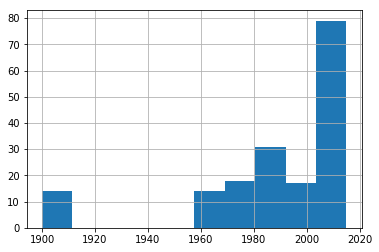

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
true_avengers = pd.DataFrame()

avengers['Year'].hist()

Since Avengers are only introduced after 1960, all data entries before 1960 are being removed.

In [35]:
true_avengers = avengers[avengers["Year"]>1960]

# Counting Avengers' deaths

In [36]:
def count_deaths(row):
    num_death = 0
    cols = ["Death1","Death2","Death3","Death4","Death5"]
    for c in cols:
        if pd.isnull(row[c]) or row[c]=="NO":
            continue
        elif row[c]=="YES":
            num_death+=1
    return num_death
true_avengers["Deaths"] = true_avengers.apply(count_deaths,axis=1)

/Users/kwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [43]:
joined_accuracy_count  = int()
correct_counting = true_avengers[true_avengers["Years since joining"] == (2015-true_avengers["Year"])]
joined_accuracy_count = len(correct_counting)
joined_accuracy_count

159